In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="a129e2c7870a7d314c84a3871914637b97efd8217be3b97f6da690bcab4a40b681f94d333195c7138df17be8f687c6f1089c6597db75976628e6f1cd28fa04f9", overwrite=True)


In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
import qiskit
import qtm.evolution
import qtm.state
import qtm.qcompilation
import qtm.ansatz
import qtm.constant
from qtm.evolution import environment, mutate, selection, crossover, utils
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


In [37]:
qc_haar = qtm.state.create_haar_state_inverse(3)


def compilation_fitness(qc: qiskit.QuantumCircuit, num_steps = 5):
    compiler = qtm.qcompilation.QuantumCompilation(
        u=qc,
        vdagger=qc_haar,
        optimizer='adam',
        loss_func='loss_fubini_study'
    )
    compiler.fit(num_steps=num_steps, verbose=0)
    return np.average(compiler.loss_values)

def compilation_threshold(fitness_value):
    if fitness_value < 0.4: 
        return True
    return False

In [48]:
params = {'depth': 5,
          'num_individual': 8,  # Must mod 8 = 0
          'num_generation': 2,
          'num_qubits': 3,
          'threshold': compilation_threshold,
          'prob_mutate': 0.01}

env = environment.EEnvironment(
    params,
    fitness_func = compilation_fitness,
    selection_func = selection.elitist_selection,
    crossover_func= crossover.onepoint_crossover,
    mutate_func=mutate.bitflip_mutate,
    pool = qtm.constant.operations,
    save_progress = True
)

env.initialize_population()
env.evol() 

Step: 100%|██████████| 2/2 [00:10<00:00,  5.41s/it]

End best score, end evol progress, percent target: 0.7


In [50]:
env.save('../experiments/evolution/test.obj')

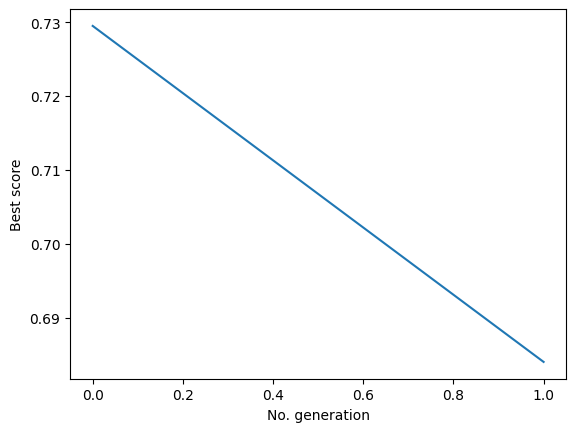

In [51]:
env.plot()

In [54]:
env2 = environment.EEnvironment("../experiments/evolution/test.obj")

In [57]:
env2.populations

[[<qtm.evolution.ecircuit.ECircuit at 0x17b852f20>,